# Data Science Project:
## Fraud Detection in Credit Card Transactions:

### Objective:
Develop a fraud detection system using open-source financial transaction data to identify and prevent fraudulent activities

### Data Extraction

In [2]:
import pandas as pd
file_path = 'creditcard_2023.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


### Outliers

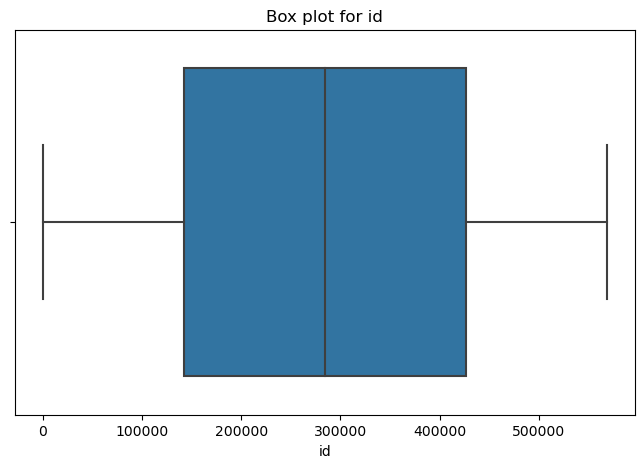

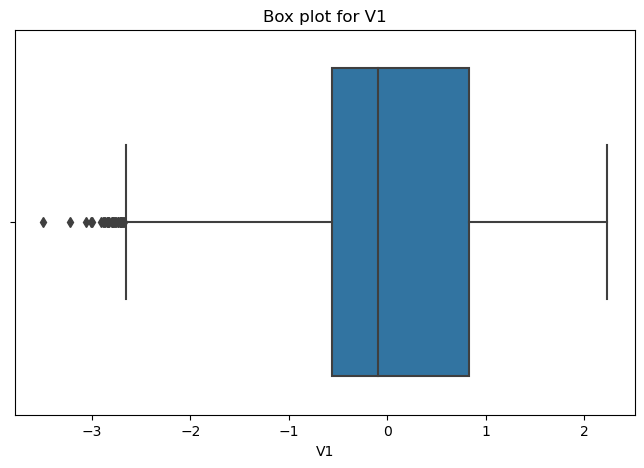

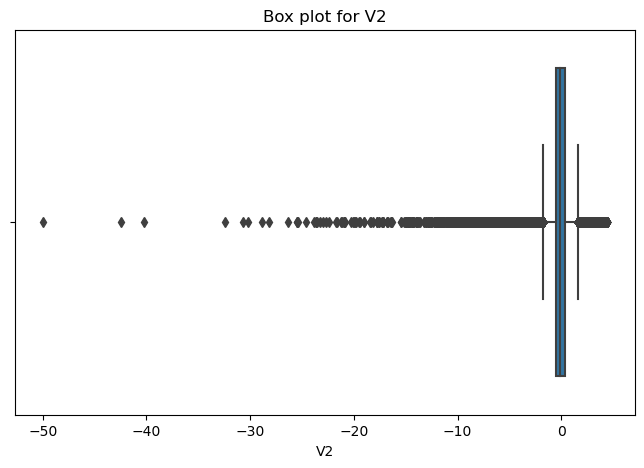

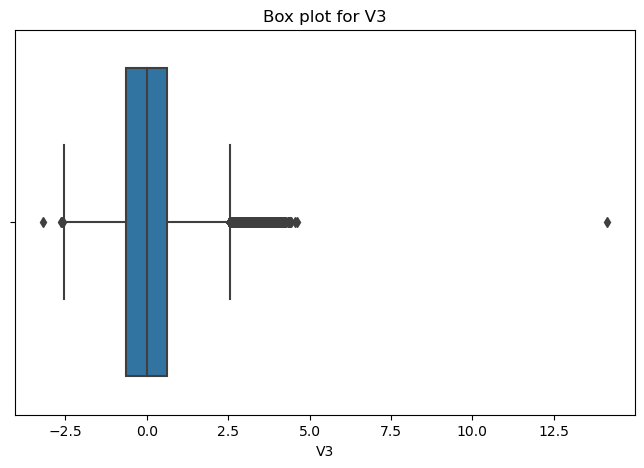

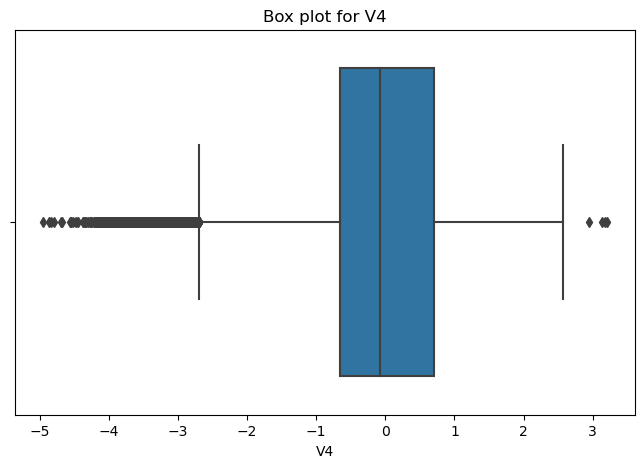

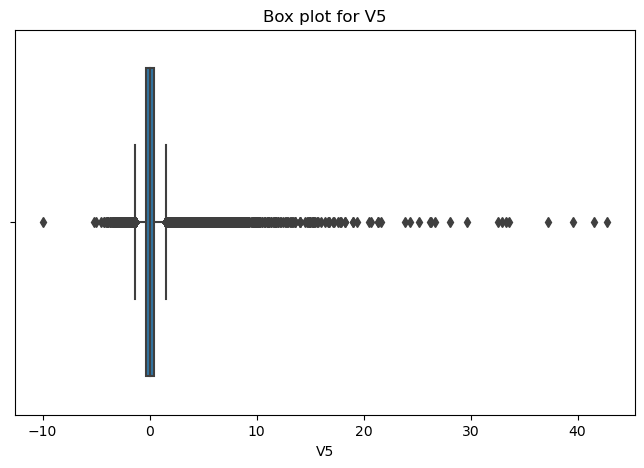

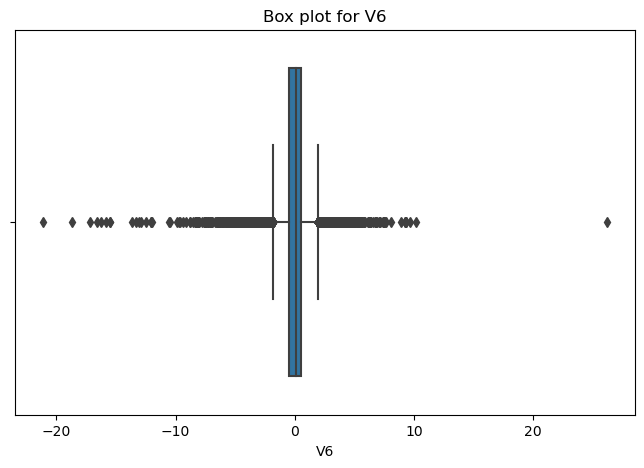

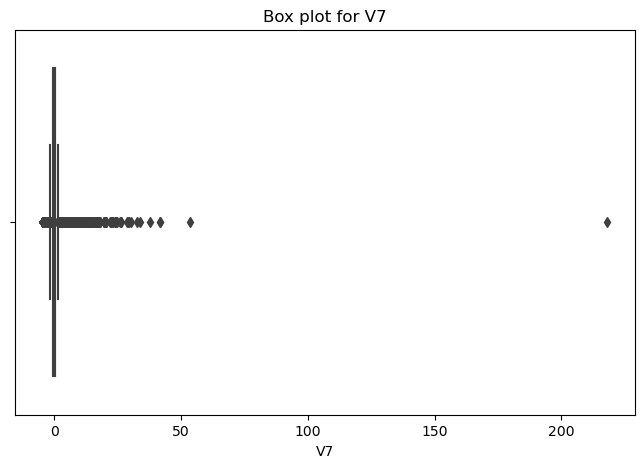

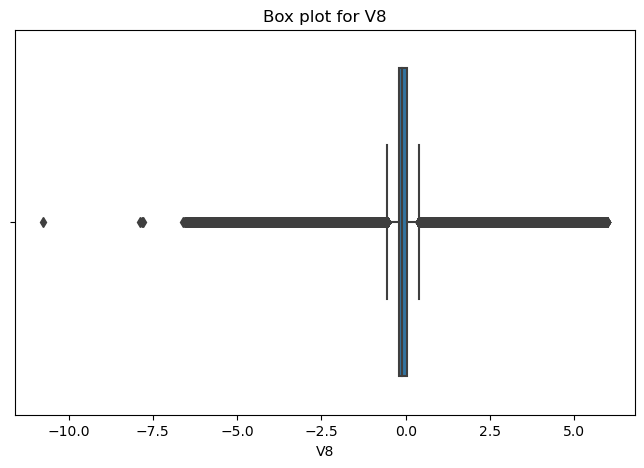

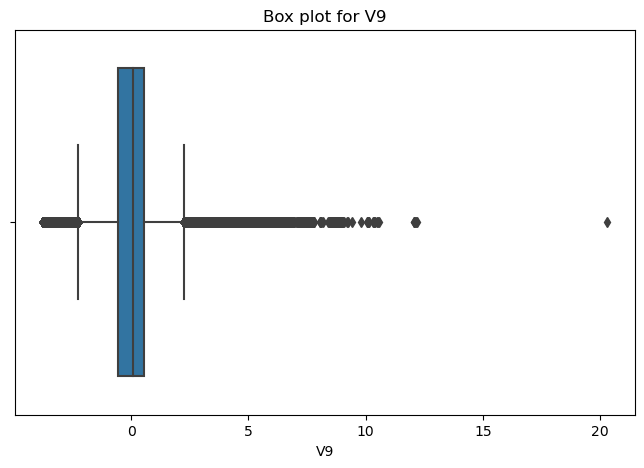

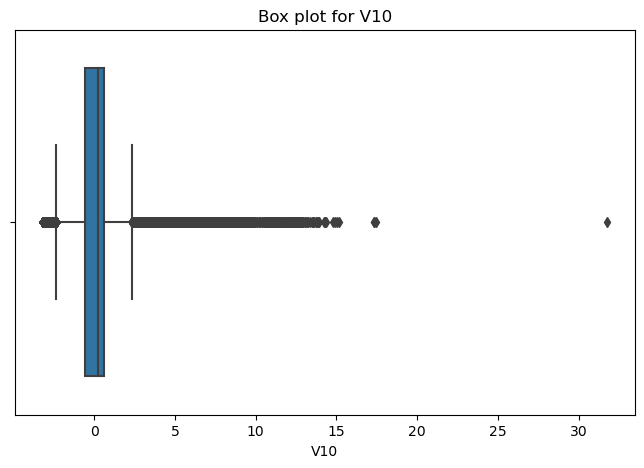

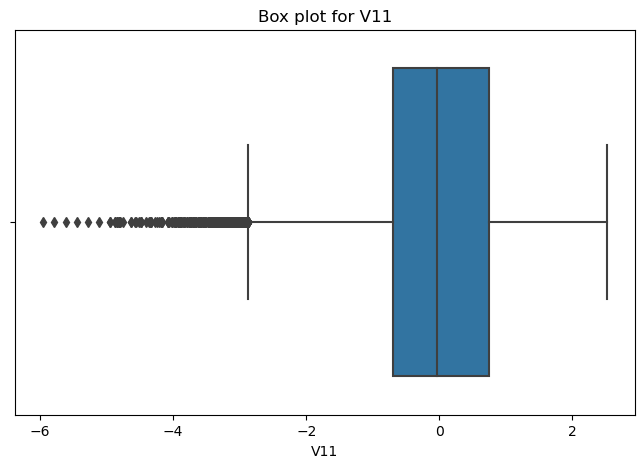

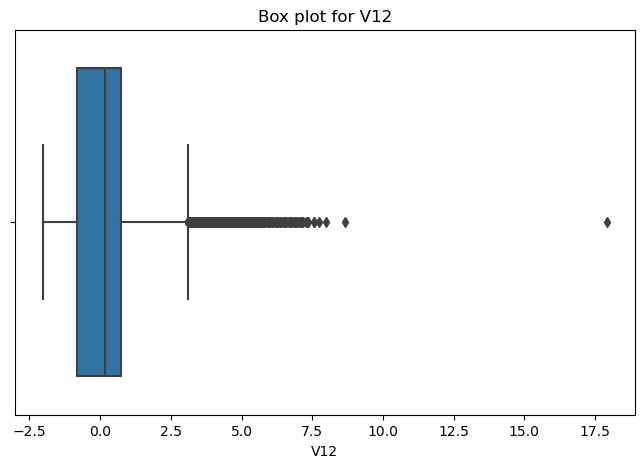

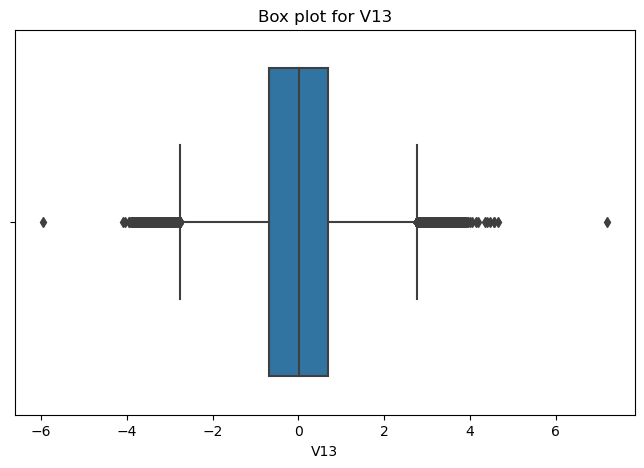

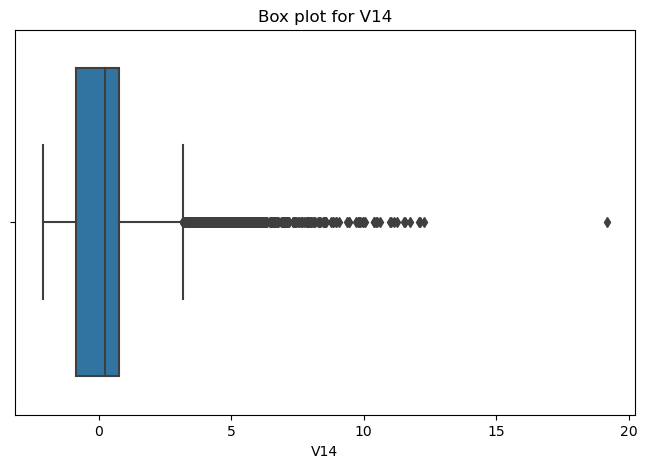

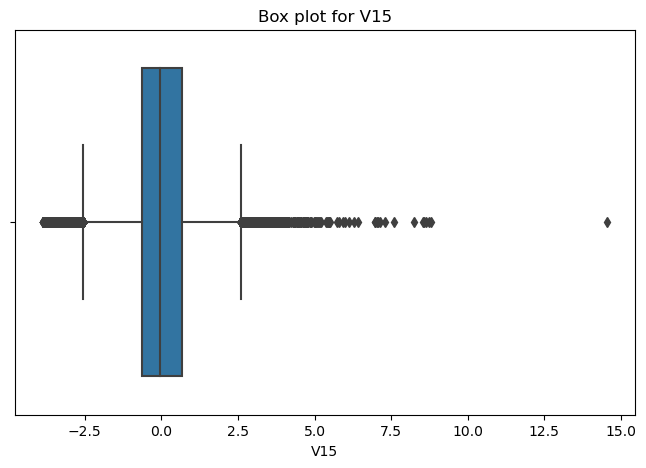

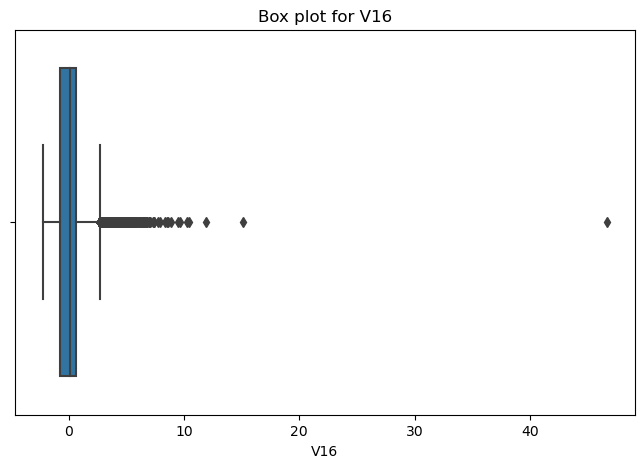

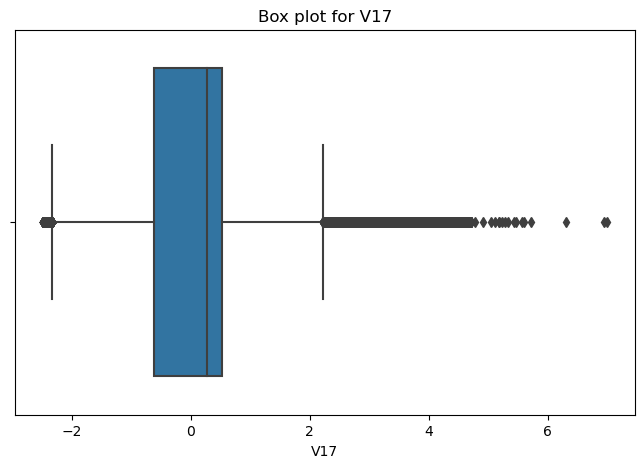

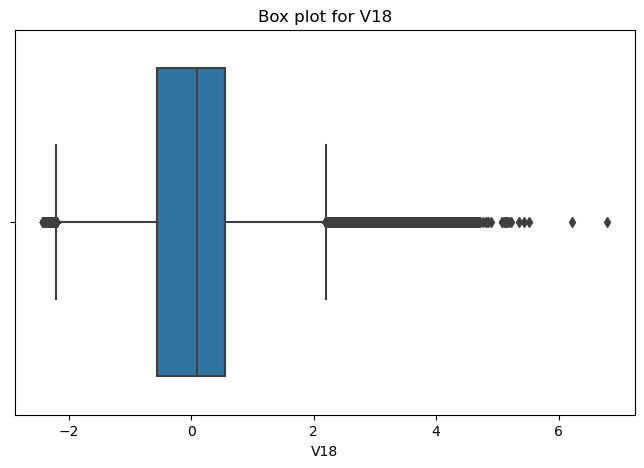

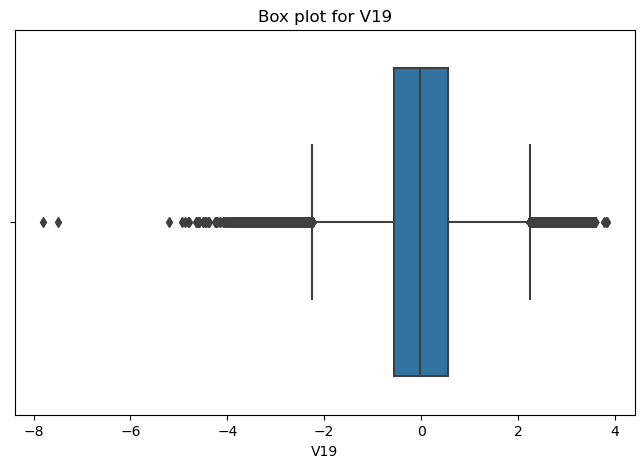

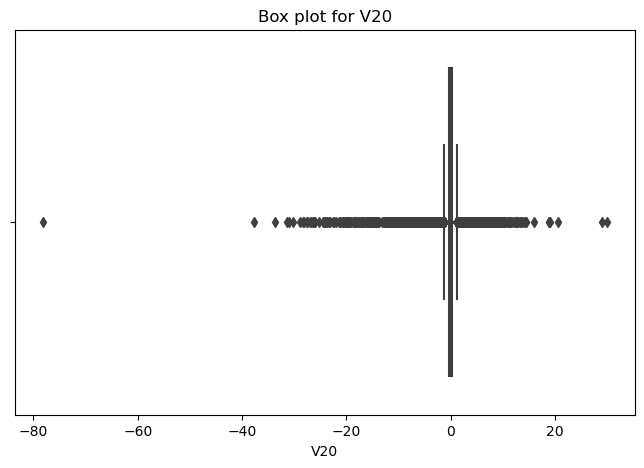

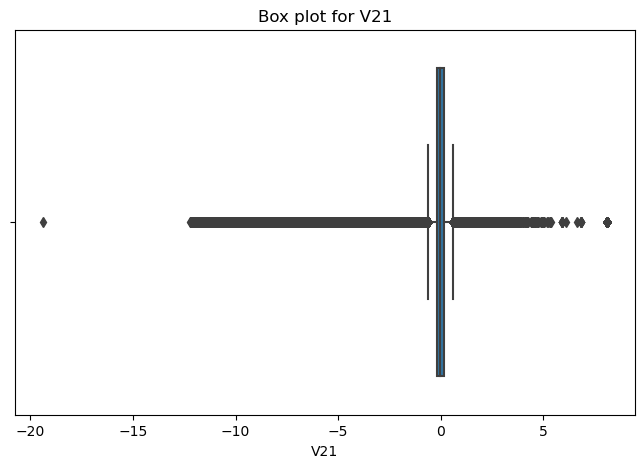

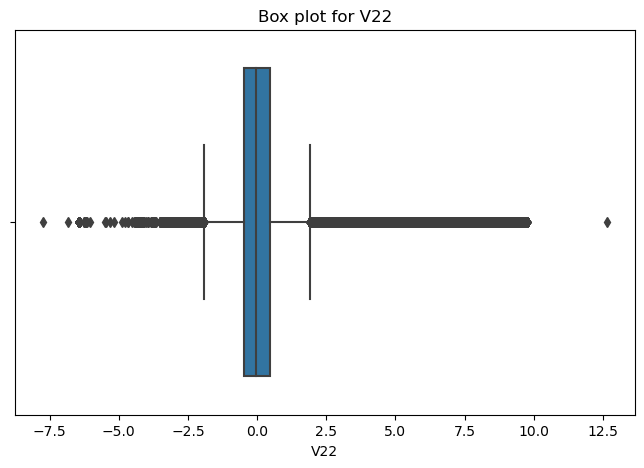

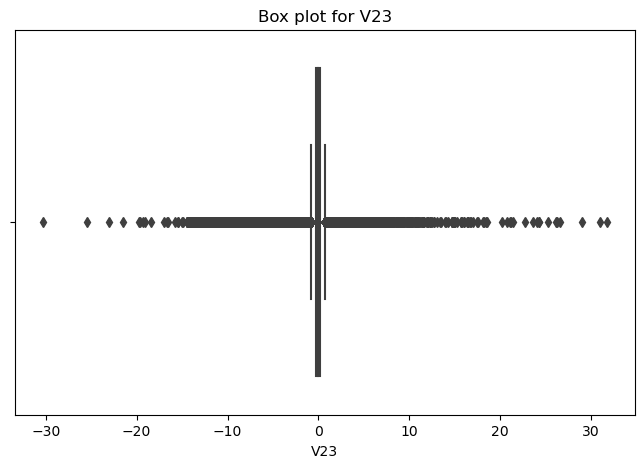

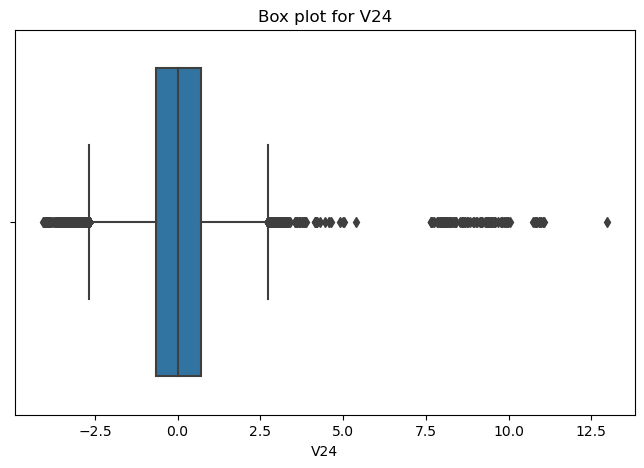

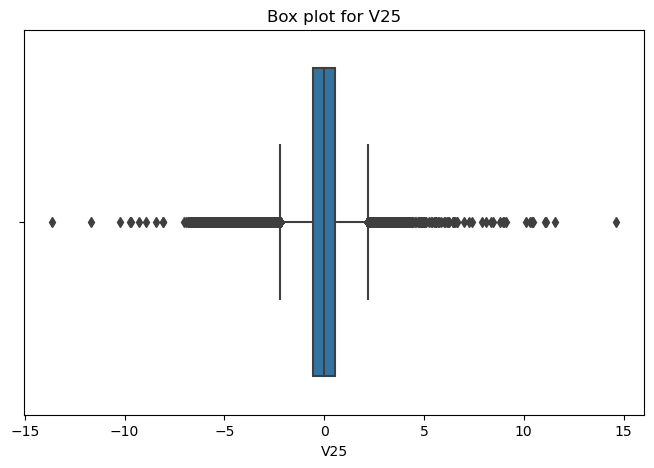

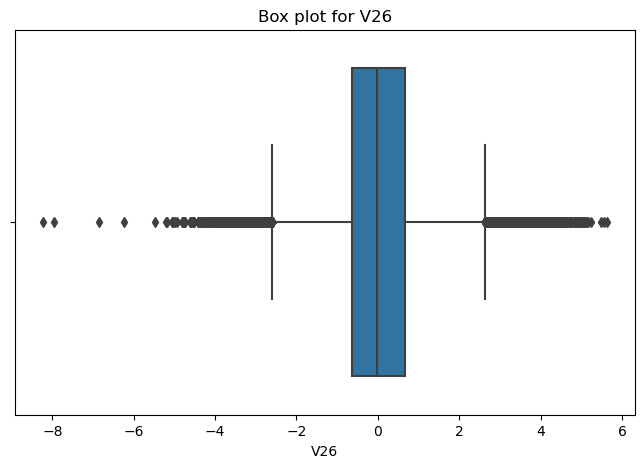

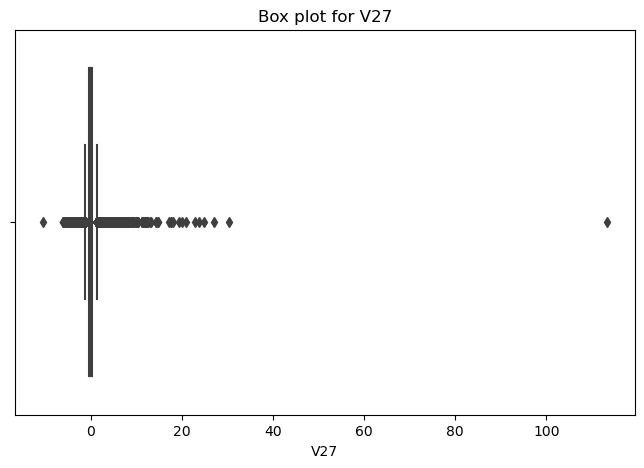

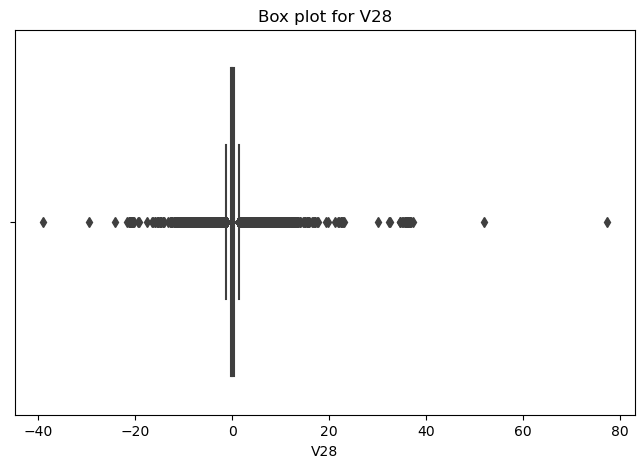

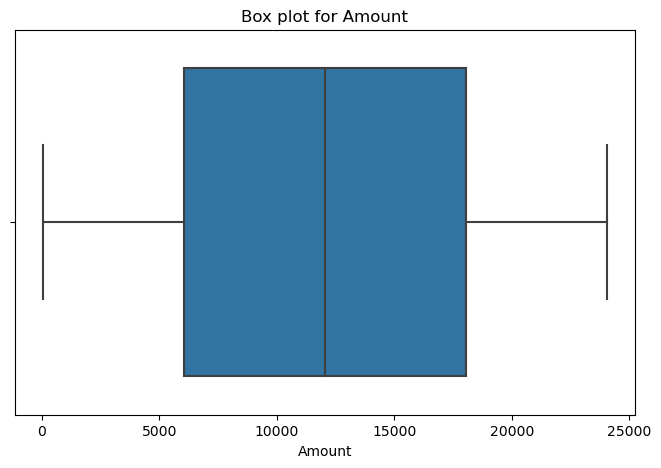

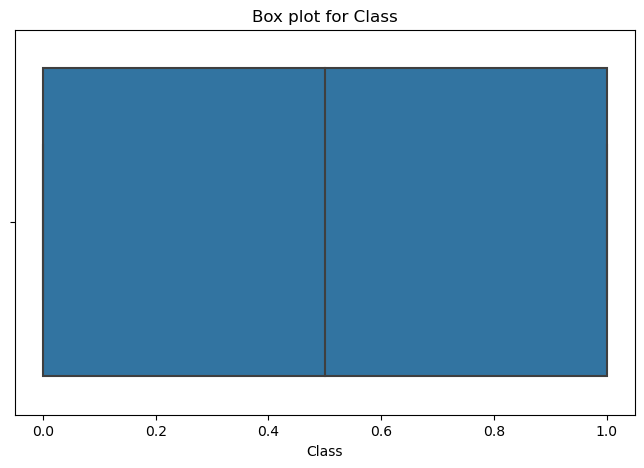

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example for visual inspection using box plots
for feature in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot for {feature}')
    plt.show()


In [9]:
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(df))
outliers = np.where(z_scores > 3)
outliers
# 'outliers' contains the indices of the outlier points


(array([     2,     52,     69, ..., 568620, 568622, 568625], dtype=int64),
 array([15, 15, 26, ..., 28, 27, 27], dtype=int64))

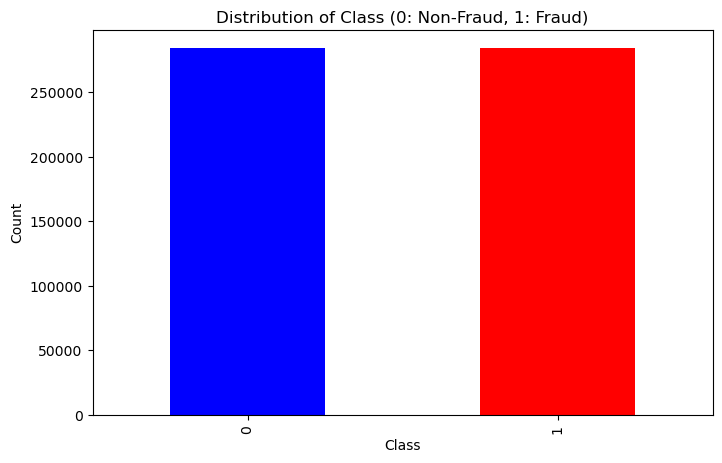

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
df['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Class (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


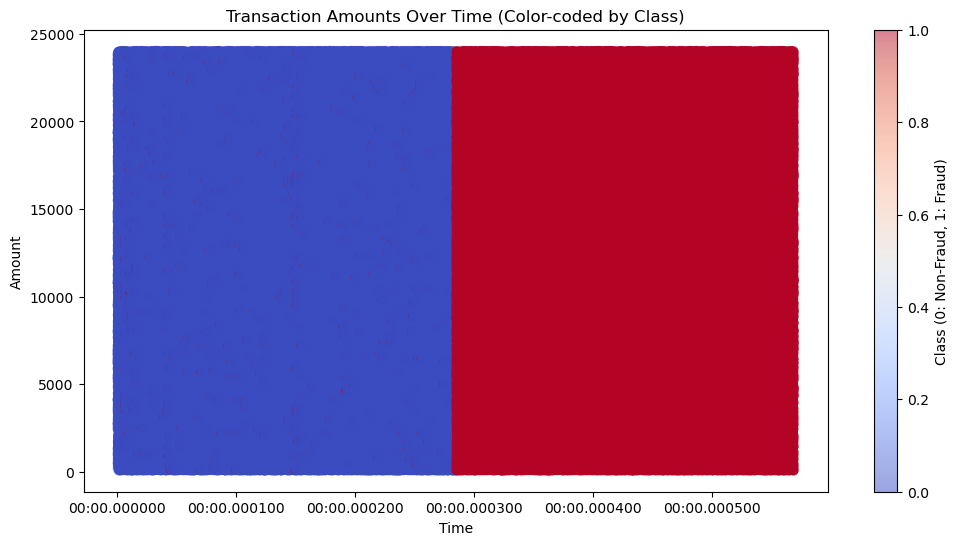

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Amount'], c=df['Class'], cmap='coolwarm', alpha=0.5)
plt.title('Transaction Amounts Over Time (Color-coded by Class)')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.colorbar(label='Class (0: Non-Fraud, 1: Fraud)')
plt.show()


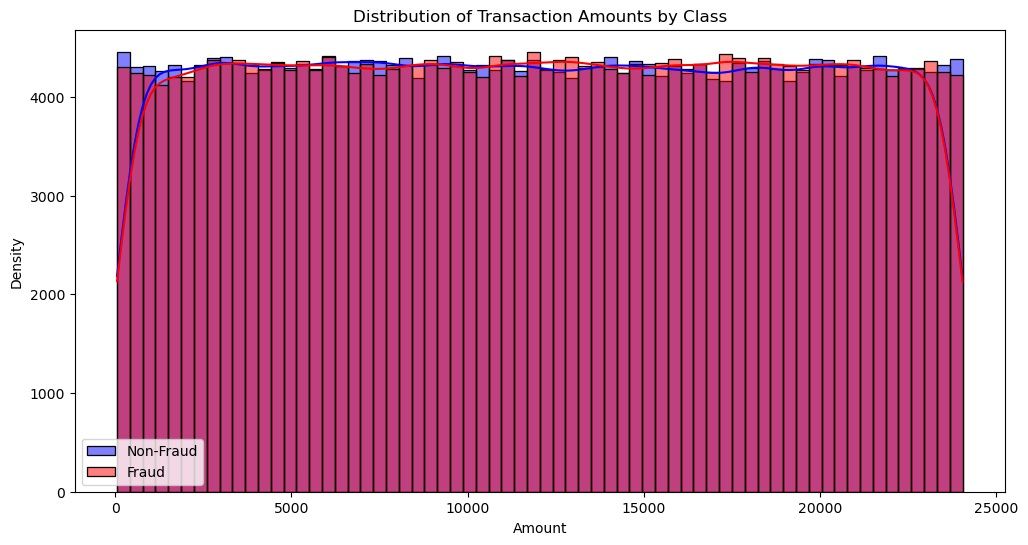

In [10]:
import seaborn as sns

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], label='Non-Fraud', kde=True, color='blue')
sns.histplot(df[df['Class'] == 1]['Amount'], label='Fraud', kde=True, color='red')
plt.title('Distribution of Transaction Amounts by Class')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.show()


### Data processing

In [3]:
#Exporing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [4]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


The mean is close to 0 and std close to 1, it suggests that our data is centered and standrized.

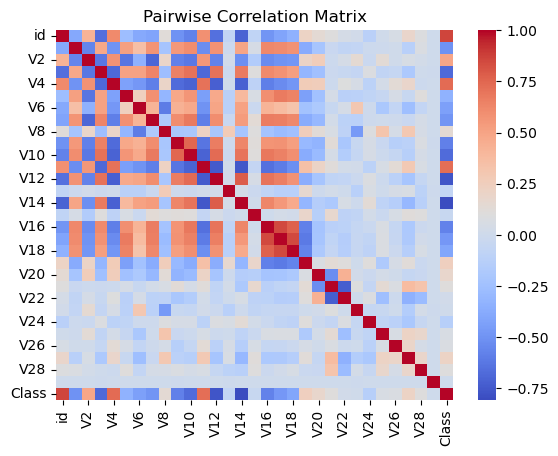

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Pairwise Correlation Matrix')
plt.show()

The intersting values of correlation are those close to 1 or -1, as we can see in this correlation matrix, we have a high correlation between class that we want to predict and V4, V14, V12, V10, also the V2 to V20 features are correlated between them.So we may have the problm of multicolinearity, to check this let's see the VIF.

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)


   Variable        VIF
0        id  13.088280
1        V1   2.166835
2        V2   3.061840
3        V3   3.164524
4        V4   3.278353
5        V5   2.905228
6        V6   2.520413
7        V7   3.062440
8        V8   2.734505
9        V9   2.979067
10      V10   3.963887
11      V11   3.537322
12      V12   4.252387
13      V13   1.155163
14      V14   4.200168
15      V15   1.178027
16      V16   4.897380
17      V17   6.620062
18      V18   4.041882
19      V19   2.017027
20      V20   1.792138
21      V21   3.586125
22      V22   2.748251
23      V23   1.591441
24      V24   1.133948
25      V25   1.404053
26      V26   1.118686
27      V27   1.565857
28      V28   1.279934
29   Amount   3.000443
30    Class  15.286585


We don't have the problem of multicolinearity between the fatures since the VIF is not greater than 10

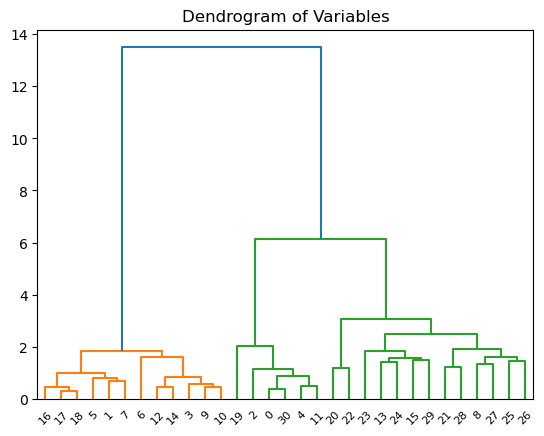

In [7]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(correlation_matrix, method='ward'))
plt.title('Dendrogram of Variables')
plt.show()


The little clusters existing show that we don't have correlations between the features

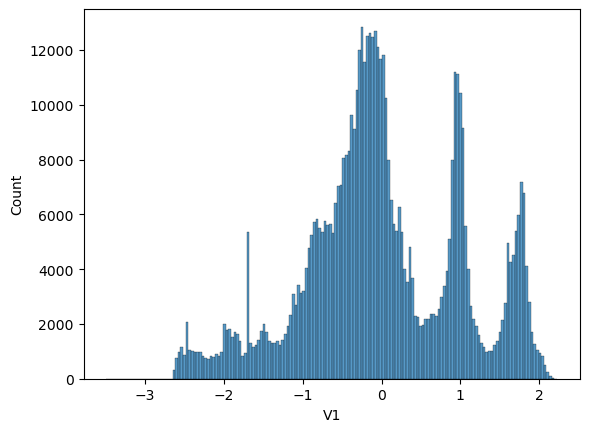

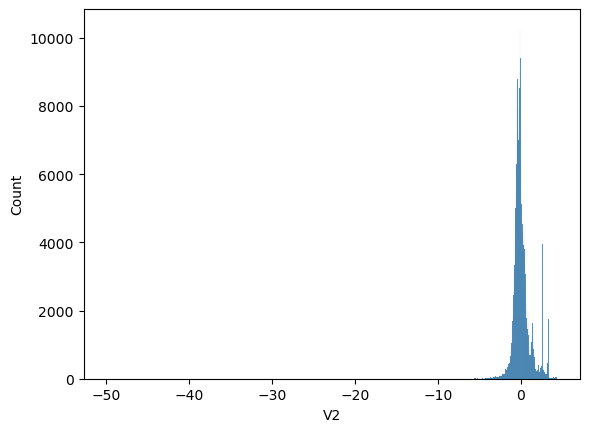

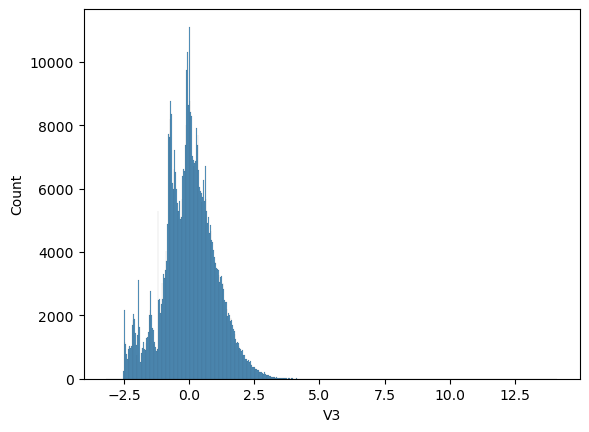

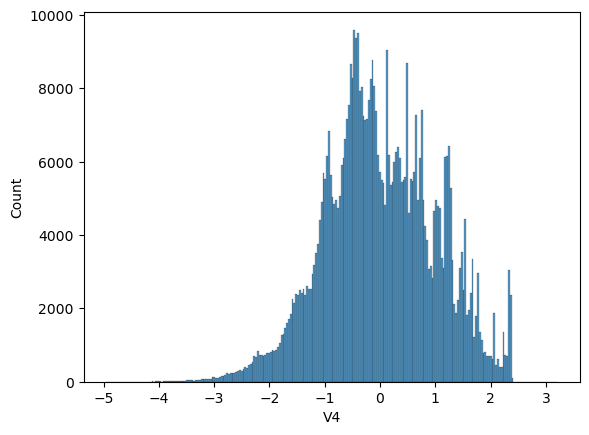

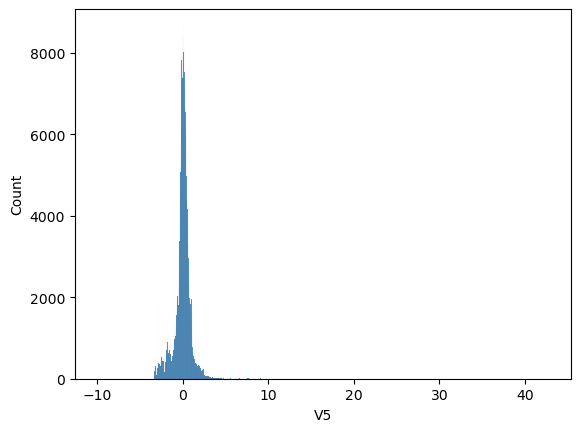

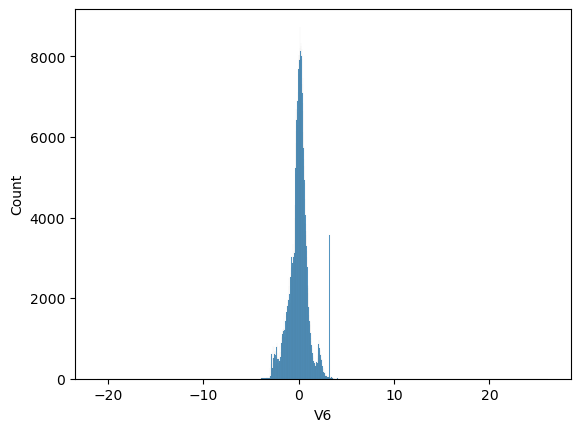

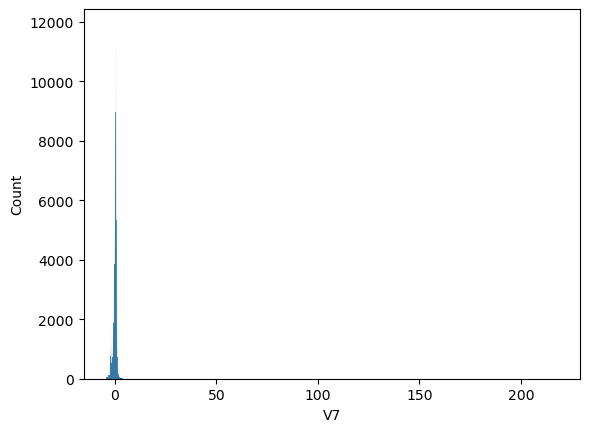

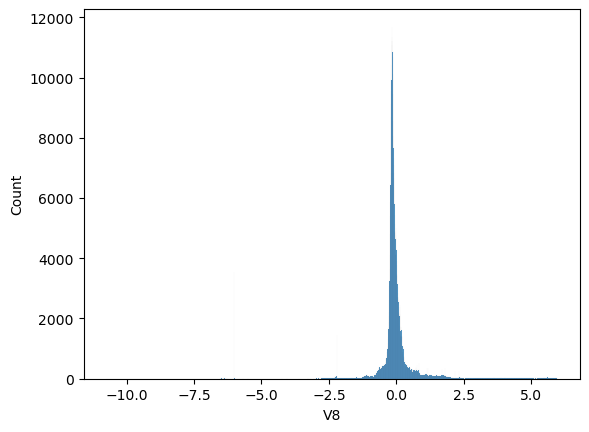

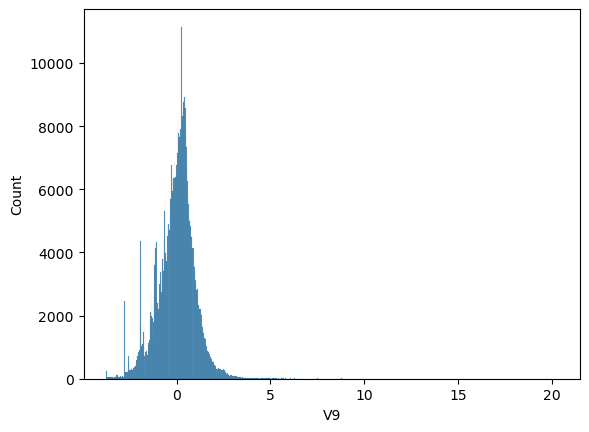

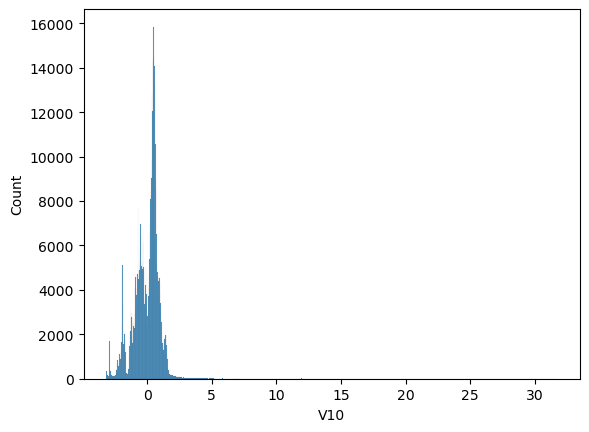

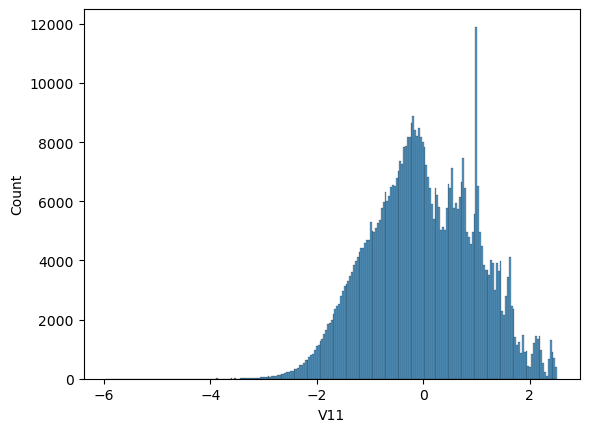

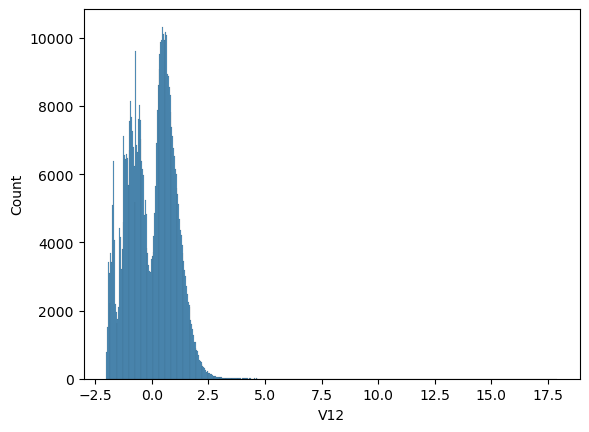

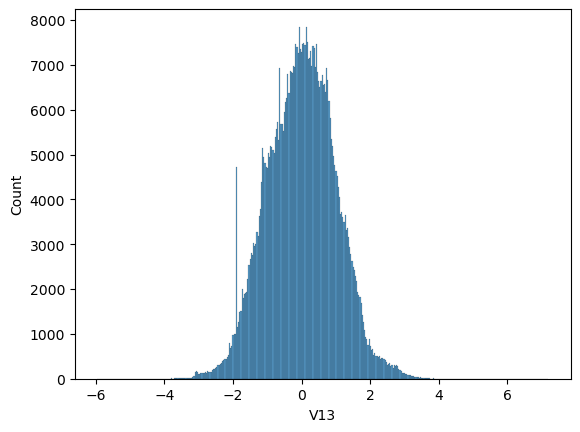

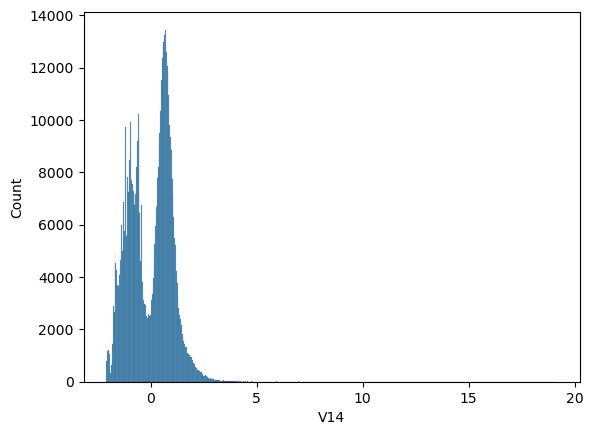

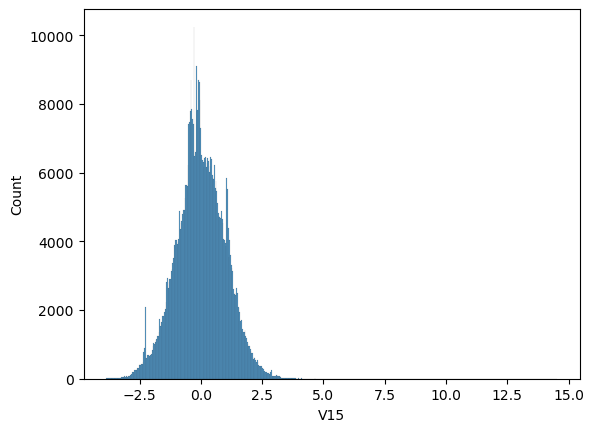

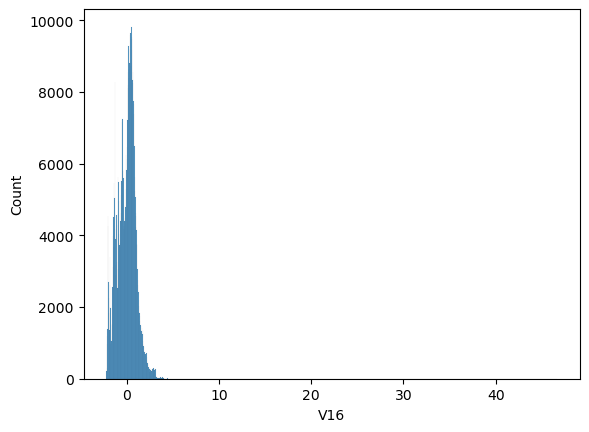

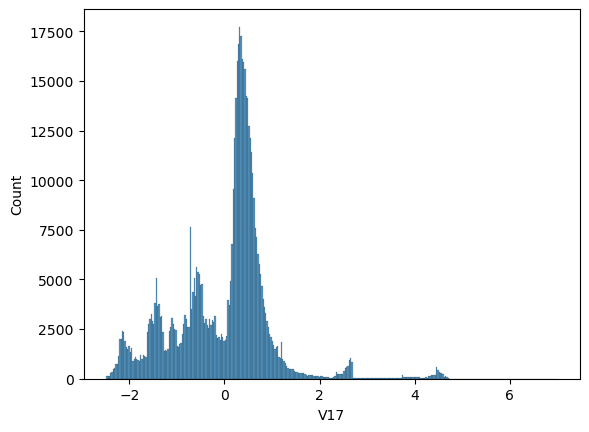

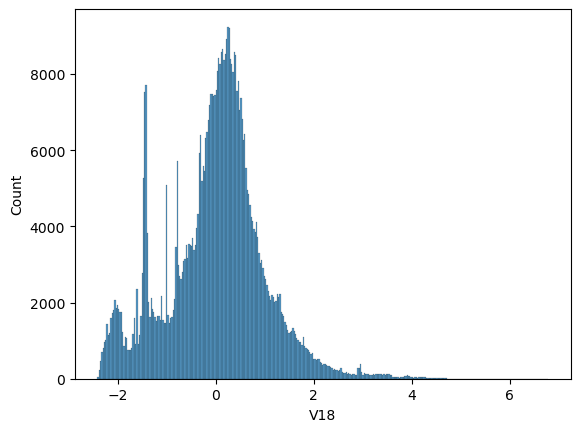

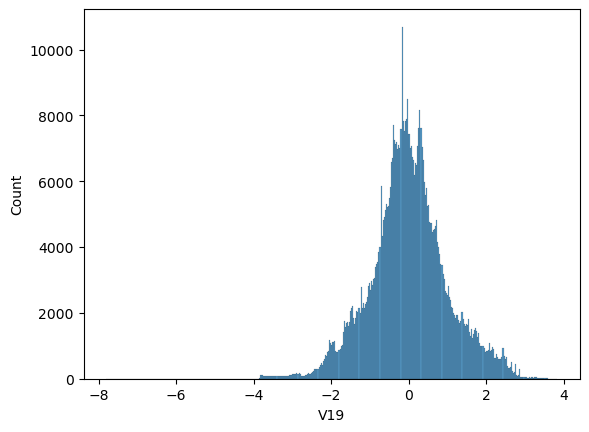

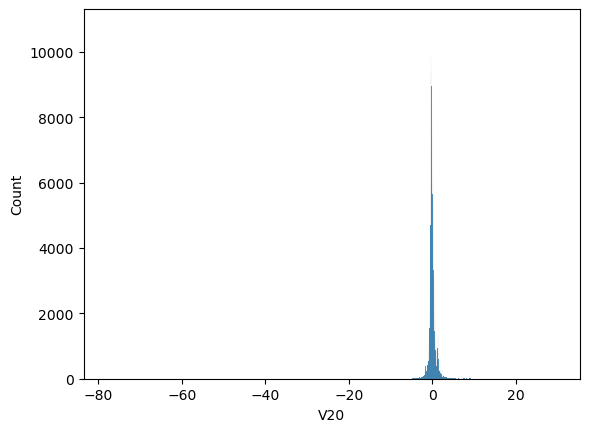

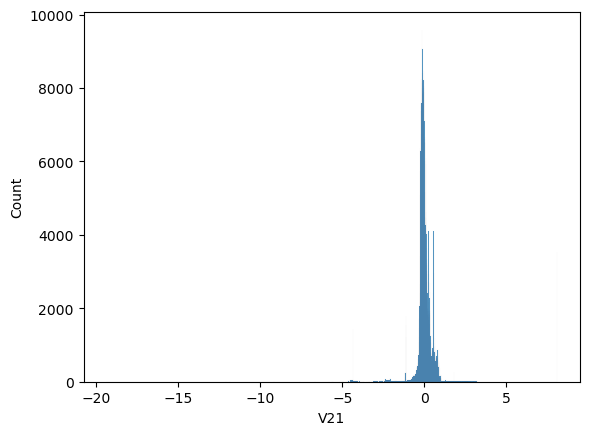

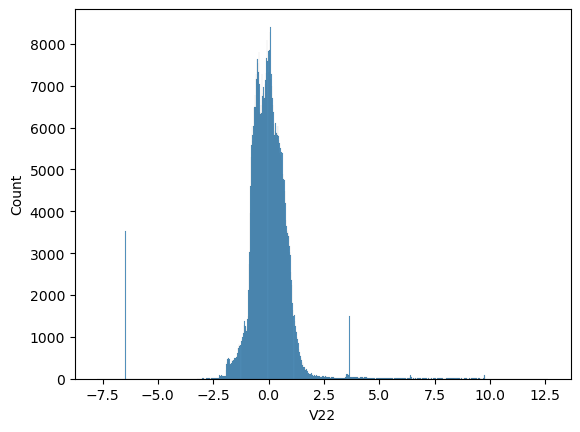

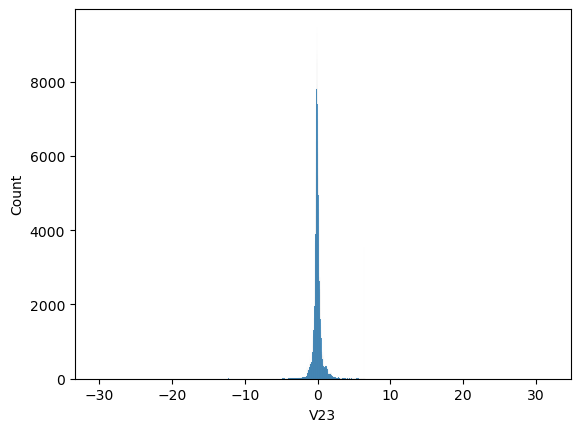

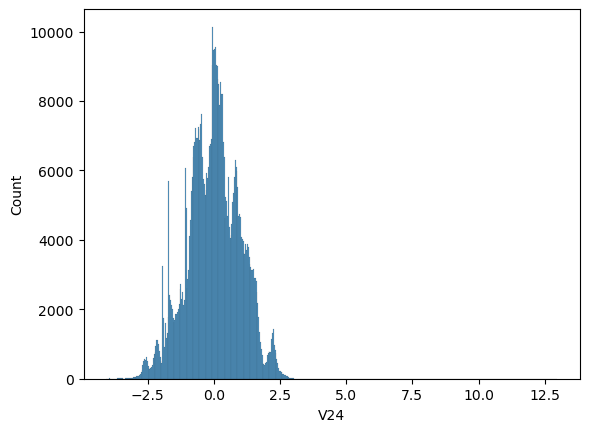

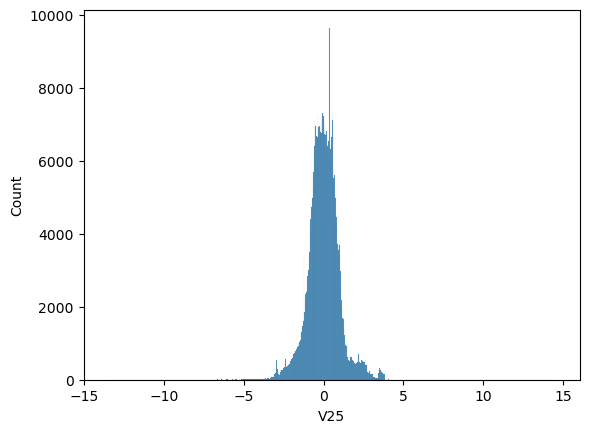

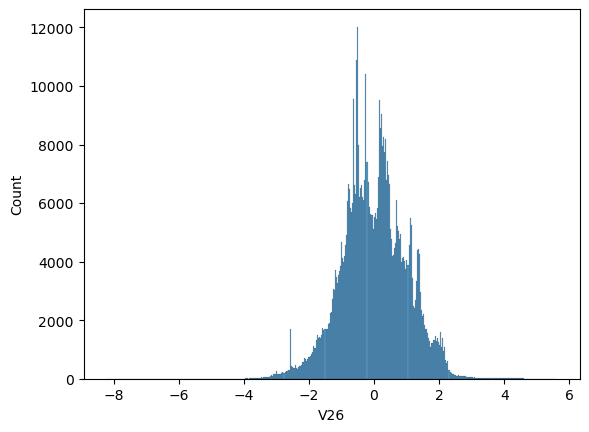

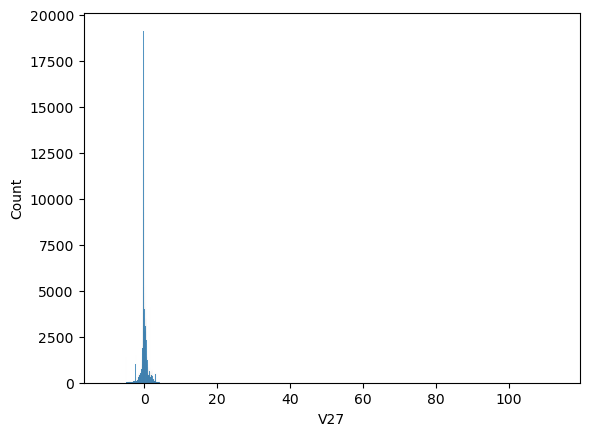

In [12]:
# Plot histogram of the numerical columns
for i in range(1,28,1):
    sns.histplot(df['V'+ str(i)])
    plt.show()


In [15]:
# Plot histogram of the numerical columns
skews=[]
for i in range(1,28,1):
    skewness = df['V'+str(i)].skew()
    skews.append(skewness)
skews

[-0.08341717301015879,
 -1.397951923713946,
 0.014622213363246254,
 -0.04416892714770696,
 1.5064136757634041,
 -0.2016110101307477,
 19.026866097533325,
 0.2999722258586845,
 0.17105746155506976,
 0.7404135529207346,
 -0.02089056131978458,
 0.06675895200237957,
 0.014906385371884177,
 0.2078348004501865,
 0.0112329832827567,
 0.26640700878187756,
 0.37306096758486784,
 0.12919105951072873,
 -0.010171229833627931,
 -1.5564597600792378,
 -0.10898326124277506,
 0.3185294709245726,
 -0.0996874579406956,
 0.06608973847371898,
 0.023008036822676475,
 -0.018958738922398494,
 2.7554523064841256]

As we can see, for the step of feature engineering, since we have all the distributions are centered with a dominant zero skewness;that indicates a perfectly symmetrical distribution where the left and right tails are of equal length and shape.
Now we are willing to look for the exact number of composants taht we are using for the PCA.

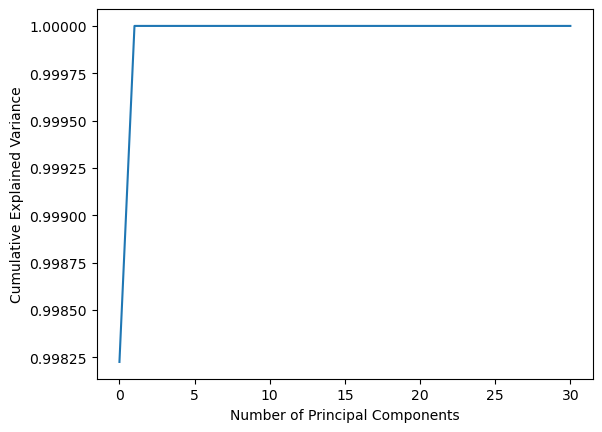

In [8]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(df)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

We can see that 1 number is significant for the explanation of the data, to be more sure we can calculate that number by using a threshold : 95%

In [25]:
threshold = 0.95 # Set our desired threshold
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= threshold) + 1
n_components


1

That shows that PCA wouldn't have an effect for our data, let't do some feature selection

## Feature selection using the Gradient Boosting classifier

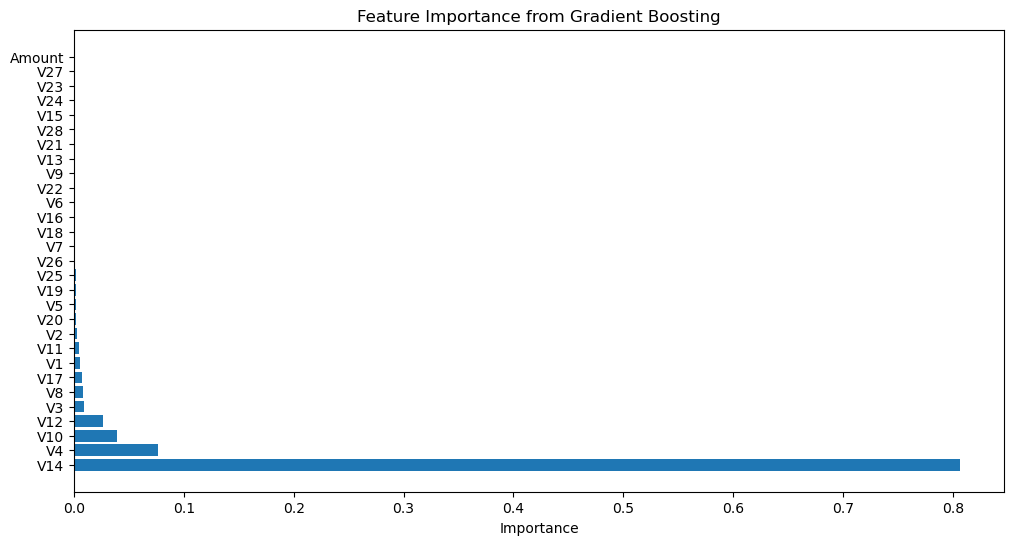

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt


X = df.drop(['id', 'Class'], axis=1)  # Dropping 'id' and 'Class' columns
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = gb_model.feature_importances_

# Create a DataFrame to better visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Gradient Boosting')
plt.show()

# Select top N features based on importance
top_n_features = 10  # Change this value based on your preference
selected_features = feature_importance_df['Feature'][:top_n_features].tolist()

# Subset your dataset with the selected features
X_selected = X[selected_features]


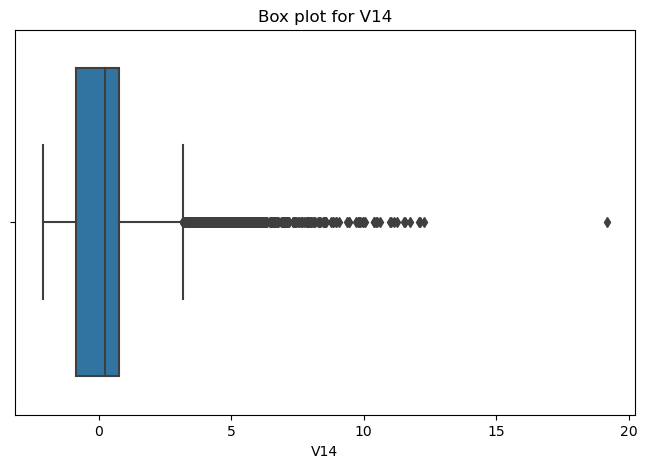

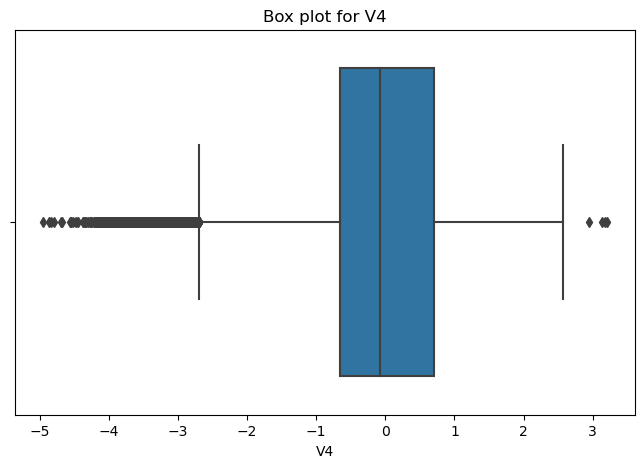

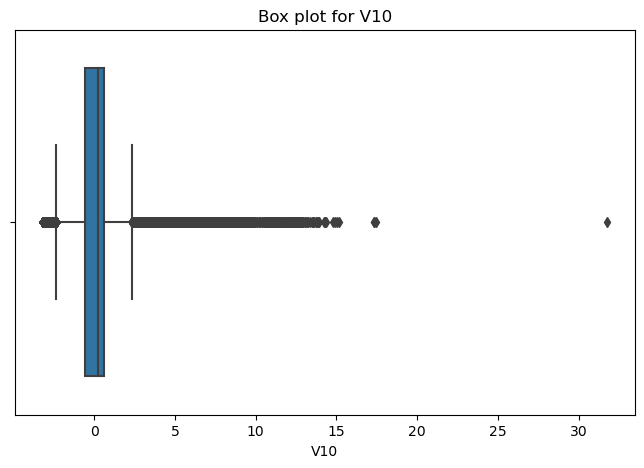

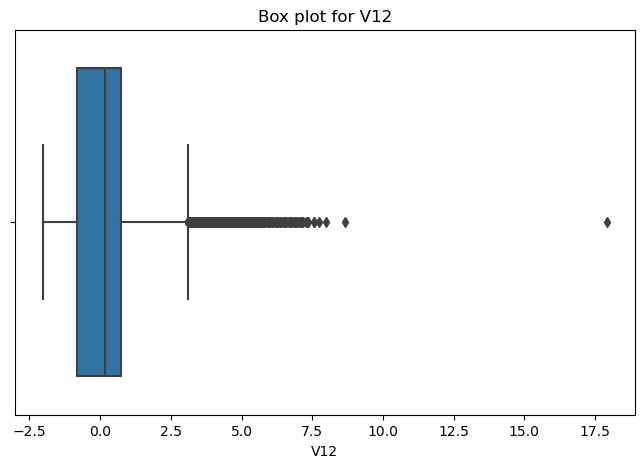

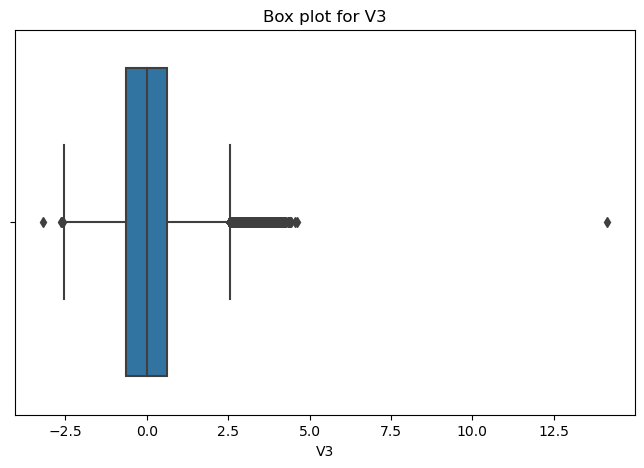

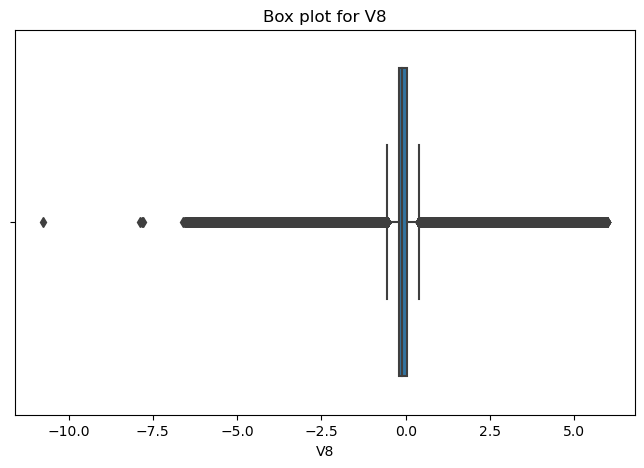

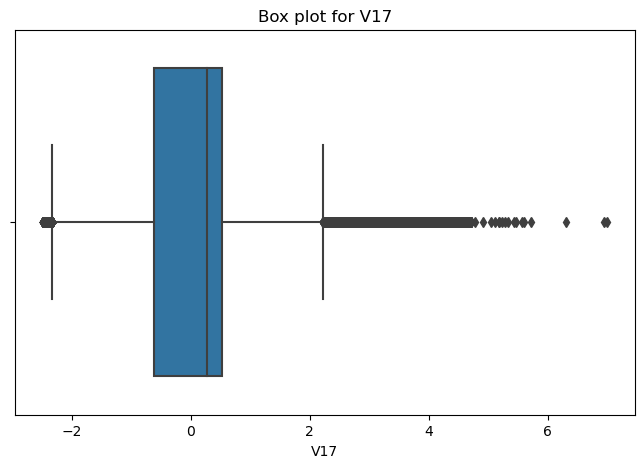

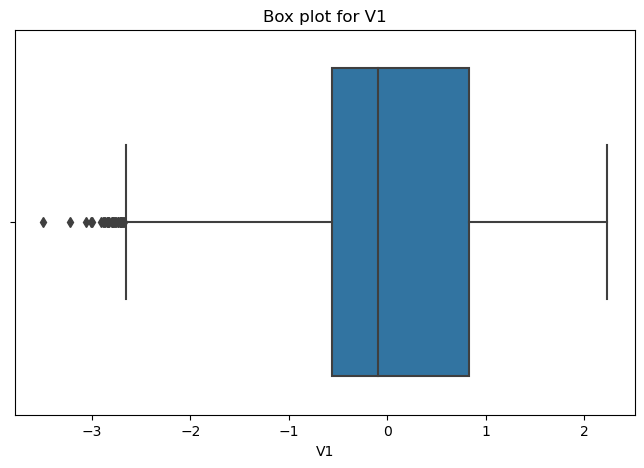

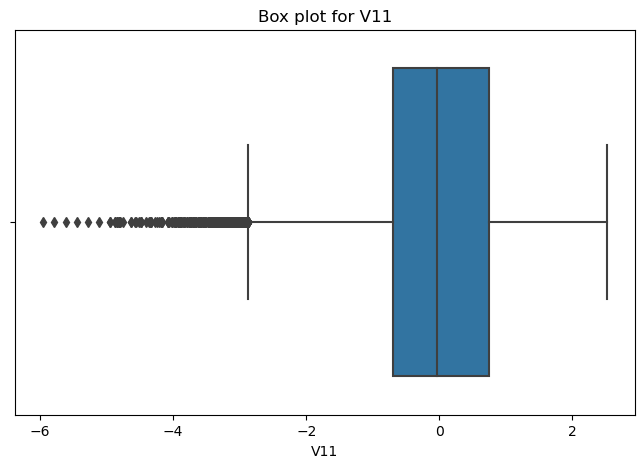

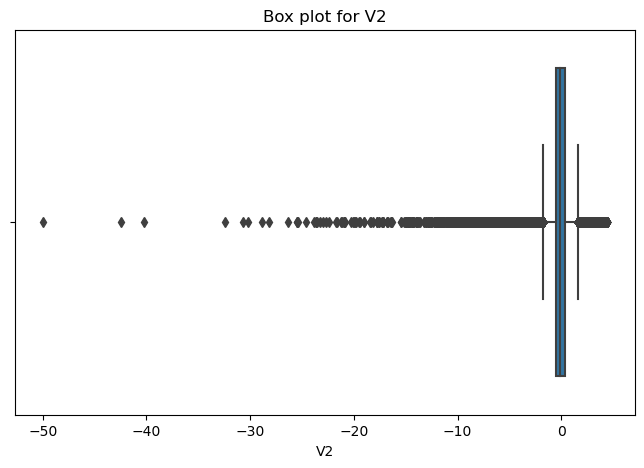

In [16]:
for feature in X_selected.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=X_selected[feature])
    plt.title(f'Box plot for {feature}')
    plt.show()

# Machine Learning

## random Forest cross-validation

In [17]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
import numpy as np


X_selected = X[selected_features]

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Choose the number of folds for cross-validation (e.g., 5 or 10)
num_folds = 5

# Create a StratifiedKFold object for stratified sampling (important for imbalanced datasets)
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the scoring metric (F1 score)
scoring_metric = make_scorer(f1_score)

# Perform cross-validation and print the average F1 score
cross_val_results_f1 = cross_val_score(rf_model, X_selected, y, cv=stratified_kfold, scoring=scoring_metric)

# Print the cross-validation results
print(f'Cross-Validation F1 Score Results: {cross_val_results_f1}')
print(f'Average F1 Score: {np.mean(cross_val_results_f1)}')


Cross-Validation F1 Score Results: [0.99967476 0.99974506 0.99971867 0.99970989 0.99965719]
Average F1 Score: 0.9997011133358829


## Random Forest with grid search

In [17]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
import numpy as np


X_selected = X[selected_features]

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Choose the number of folds for cross-validation 
num_folds = 5

# Create a StratifiedKFold object for stratified sampling (important for imbalanced datasets)
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the scoring metric (F1 score)
scoring_metric = make_scorer(f1_score)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    # Add other hyperparameters
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=stratified_kfold, scoring=scoring_metric, n_jobs=-1)
grid_search.fit(X_selected, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to create the final model
final_rf_model = RandomForestClassifier(random_state=42, **best_params)

# Perform cross-validation with the final model and print the average F1 score
cross_val_results_f1 = cross_val_score(final_rf_model, X_selected, y, cv=stratified_kfold, scoring=scoring_metric)

# Print the cross-validation results
print(f'Cross-Validation F1 Score Results: {cross_val_results_f1}')
print(f'Average F1 Score: {np.mean(cross_val_results_f1)}')


Cross-Validation F1 Score Results: [0.99967476 0.99978022 0.99970987 0.99972747 0.99968355]
Average F1 Score: 0.9997151754678478


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Perform cross-validation with the final model and print the average scores for additional metrics
additional_metrics = ['accuracy', 'precision', 'recall']  # Add any other metrics you're interested in

cross_val_results_additional = {}
for metric in additional_metrics:
    scoring_metric = make_scorer(eval(metric + '_score'))  # Create the scoring metric dynamically
    cross_val_results_additional[metric] = cross_val_score(final_rf_model, X_selected, y, cv=stratified_kfold, scoring=scoring_metric)

    # Print the cross-validation results for each additional metric
    print(f'Cross-Validation {metric.capitalize()} Results: {cross_val_results_additional[metric]}')
    print(f'Average {metric.capitalize()}: {np.mean(cross_val_results_additional[metric])}')


Cross-Validation Accuracy Results: [0.99967466 0.99978017 0.99970983 0.99972742 0.99968345]
Average Accuracy: 0.9997151047253926
Cross-Validation Precision Results: [0.99934974 0.9995781  0.99956048 0.9995078  0.9993673 ]
Average Precision: 0.9994726845833803
Cross-Validation Recall Results: [1.         0.99998241 0.99985931 0.99994724 1.        ]
Average Recall: 0.9999577932926508


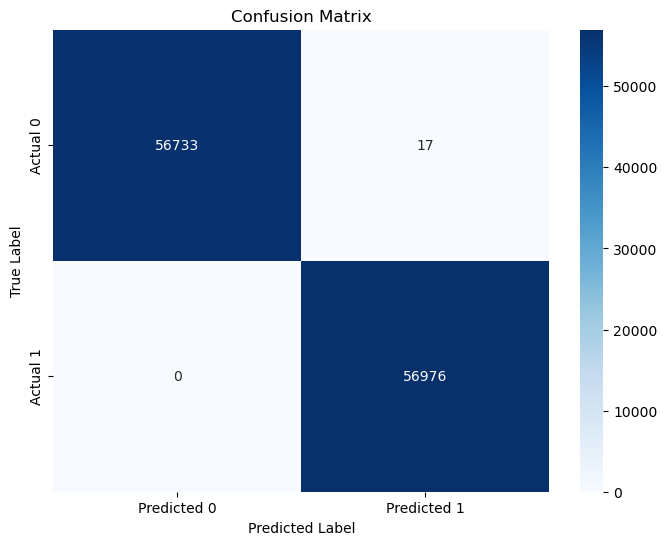

In [20]:
# Train or fit the model with your training data
final_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_rf_model.predict(X_test)

# Now, we can calculate and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### SVM

In [18]:
from sklearn.svm import SVC

# Create the Support Vector Classifier model
svc_model = SVC(random_state=42)

# Perform cross-validation and print the average F1 score for SVC
cross_val_results_f1_svc = cross_val_score(svc_model, X_selected, y, cv=stratified_kfold, scoring=scoring_metric)

# Print the cross-validation results for SVC
print(f'Cross-Validation F1 Score Results (SVC): {cross_val_results_f1_svc}')
print(f'Average F1 Score (SVC): {np.mean(cross_val_results_f1_svc)}')


Cross-Validation F1 Score Results (SVC): [0.9803516  0.98064778 0.97942583 0.98021718 0.97984441]
Average F1 Score (SVC): 0.9800973619347415


### Logreg

C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

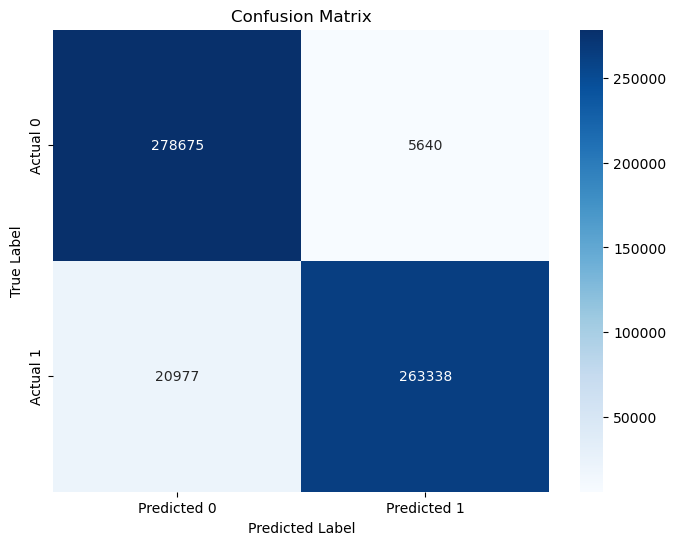

Accuracy: 0.9531910029368834
F1 Score: 0.9518934813923183


In [13]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(['id', 'Class'], axis=1)
y = df['Class']

# Create your model (Logistic Regression in this case)
model = LogisticRegression()

# Choose the number of folds for cross-validation (e.g., 5 or 10)
num_folds = 5

# Create a StratifiedKFold object for stratified sampling (important for imbalanced datasets)
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the scoring metrics (accuracy and F1 score)
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# Perform cross-validation
y_pred = cross_val_predict(model, X, y, cv=stratified_kfold)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the average accuracy and F1 score
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')


# Deep learning model

In [11]:
pip install tensorflow

#### Define the models




Epoch 1/20


14216/14216 [==============================] - 50s 3ms/step - loss: 0.0057 - accuracy: 0.9985 - binary_accuracy: 0.9985 - val_loss: 0.0021 - val_accuracy: 0.9995 - val_binary_accuracy: 0.9995
Epoch 2/20
14216/14216 [==============================] - 48s 3ms/step - loss: 0.0025 - accuracy: 0.9994 - binary_accuracy: 0.9994 - val_loss: 0.0018 - val_accuracy: 0.9995 - val_binary_accuracy: 0.9995
Epoch 3/20
14216/14216 [==============================] - 46s 3ms/step - loss: 0.0020 - accuracy: 0.9995 - binary_accuracy: 0.9995 - val_loss: 0.0014 - val_accuracy: 0.9996 - val_binary_accuracy: 0.9996
Epoch 4/20
14216/14216 [==============================] - 48s 3ms/step - loss: 0.0017 - accuracy: 0.9996 - binary_accuracy: 0.9996 - val_loss: 0.0021 - val_accuracy: 0.9994 - val_binary_accuracy: 0.9994
Epoch 5/20
14216/14216 [==============================] - 49s 3ms/step - loss: 0.0017 - accuracy: 0.9996 - binary_accuracy: 0.9996 - val_loss: 0.0013 - val_accuracy: 0.9997 - val_bina

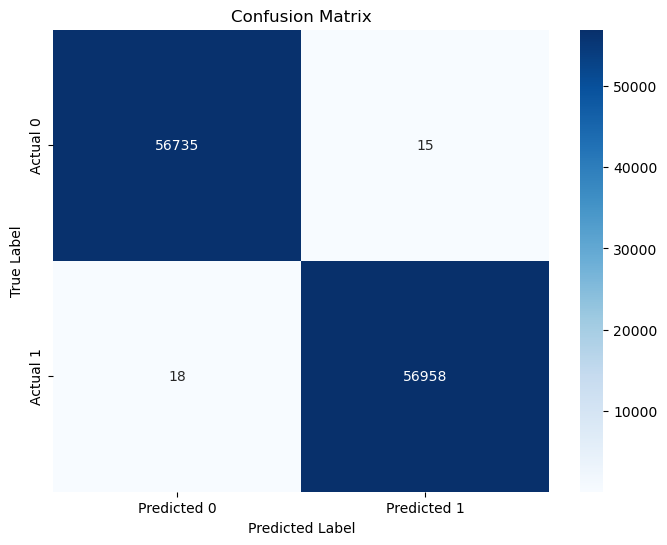

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt


X = df.iloc[:, :30].values
y = df.iloc[:, 30].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but can be beneficial for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train an MLP model
mlp_model = Sequential()
mlp_model.add(Dense(128, activation='relu', input_shape=(30,)))  # Adjust input_shape to match the number of features
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(16, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_accuracy'])

mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model and calculate metrics
y_pred = mlp_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
